In [5]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const

In [6]:
with open('Data/cp-cal_data.txt','r') as tf:
    data = np.genfromtxt(tf).T

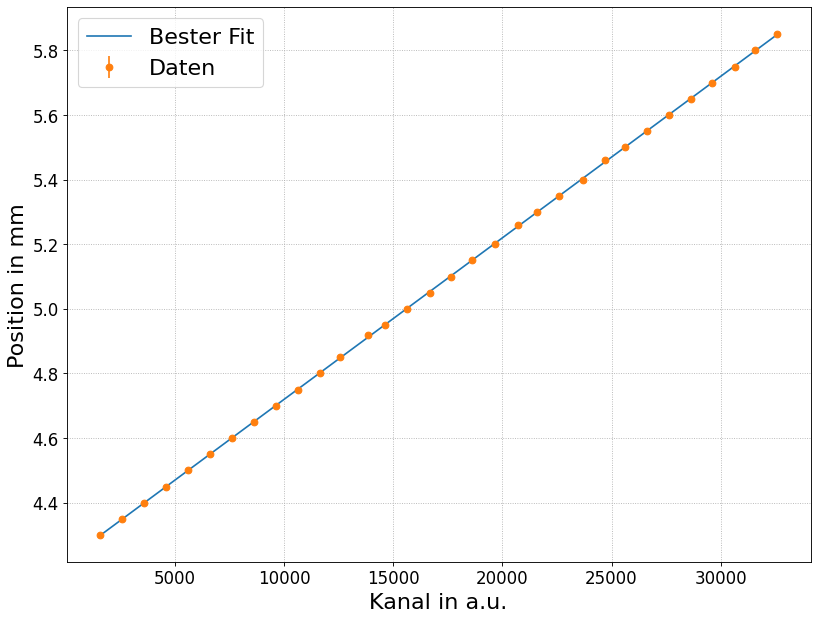

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 32
    # variables        = 2
    chi-square         = 7.62266652
    reduced chi-square = 0.25408888
    Akaike info crit   = -41.9075090
    Bayesian info crit = -38.9760372
    R-squared          = -0.11694786
[[Variables]]
    slope:      5.0002e-05 +/- 4.8242e-08 (0.10%) (init = 5.000235e-05)
    intercept:  4.21945496 +/- 9.3905e-04 (0.02%) (init = 4.219455)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8803


In [7]:
f.figsize(1)

res = f.linfit(data[1],data[0],np.full(len(data[1]),0.005))
plt.plot(data[0],res.eval(x=data[0]),label='Bester Fit')
plt.errorbar(data[0],data[1],np.full(len(data[1]),0.005),fmt='o',label='Daten')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form(xlabel='Kanal in a.u.',ylabel='Position in mm',name='Res/A3_cpcal.pdf')
print(res.fit_report())



In [8]:
with open('Res/cp-cal_res.txt','w')as tf:
    tf.write(str(res.params['slope'].value)+'\t'+str(res.params['slope'].stderr)+'\t'+str(res.params['intercept'].value)+'\t'+str(res.params['intercept'].stderr))